<a href="https://colab.research.google.com/github/mdpw/msc-ai-cw/blob/main/full_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 1. Load the dataset
file_path = "dataset/cinnamon_quality_dataset.csv"  # Use raw content URL
df = pd.read_csv(file_path)

In [6]:
# 2. Basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (1260, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sample_ID               1260 non-null   object 
 1   Moisture (%)            1260 non-null   float64
 2   Ash (%)                 1260 non-null   float64
 3   Volatile_Oil (%)        1260 non-null   float64
 4   Acid_Insoluble_Ash (%)  1260 non-null   float64
 5   Chromium (mg/kg)        1260 non-null   float64
 6   Coumarin (mg/kg)        1260 non-null   float64
 7   Quality_Label           1260 non-null   object 
dtypes: float64(6), object(2)
memory usage: 78.9+ KB
None

First 5 rows:
  Sample_ID  Moisture (%)   Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
0      H018     10.789005  5.572559          1.259205                0.209963   
1      L009     13.923084  7.043669          0.690446                0.739094   
2      H

In [7]:
# 3. Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Moisture (%)      Ash (%)  Volatile_Oil (%)  Acid_Insoluble_Ash (%)  \
count   1260.000000  1260.000000       1260.000000             1260.000000   
mean      11.887224     6.522170          1.051225                0.451606   
std        1.169604     0.628862          0.272911                0.157070   
min       10.021690     5.520874          0.606326                0.197697   
25%       11.017503     5.978487          0.771195                0.348661   
50%       11.638028     6.486592          1.082036                0.430228   
75%       12.733444     7.161447          1.260000                0.552217   
max       13.973884     7.496544          1.493286                0.794266   

       Chromium (mg/kg)  Coumarin (mg/kg)  
count       1260.000000       1260.000000  
mean           0.002207          0.008836  
std            0.000744          0.004919  
min            0.000993          0.002077  
25%            0.001601          0.004400  
50%     

In [8]:
# 4. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Sample_ID                 0
Moisture (%)              0
Ash (%)                   0
Volatile_Oil (%)          0
Acid_Insoluble_Ash (%)    0
Chromium (mg/kg)          0
Coumarin (mg/kg)          0
Quality_Label             0
dtype: int64


In [9]:
# Remove text after first space in column names
df.columns = [col.split(' ')[0] for col in df.columns]


Target Distribution:
Quality_Label
High      420
Low       420
Medium    420
Name: count, dtype: int64


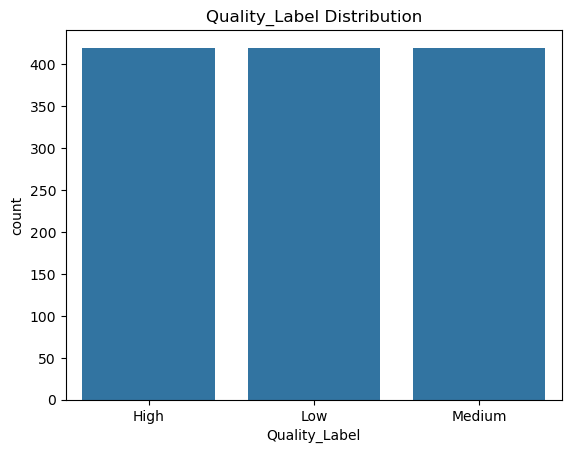

In [10]:
# 5. Class distribution (Quality_Label)
print("\nTarget Distribution:")
print(df['Quality_Label'].value_counts())
sns.countplot(x='Quality_Label', data=df)
plt.title('Quality_Label Distribution')
plt.show()

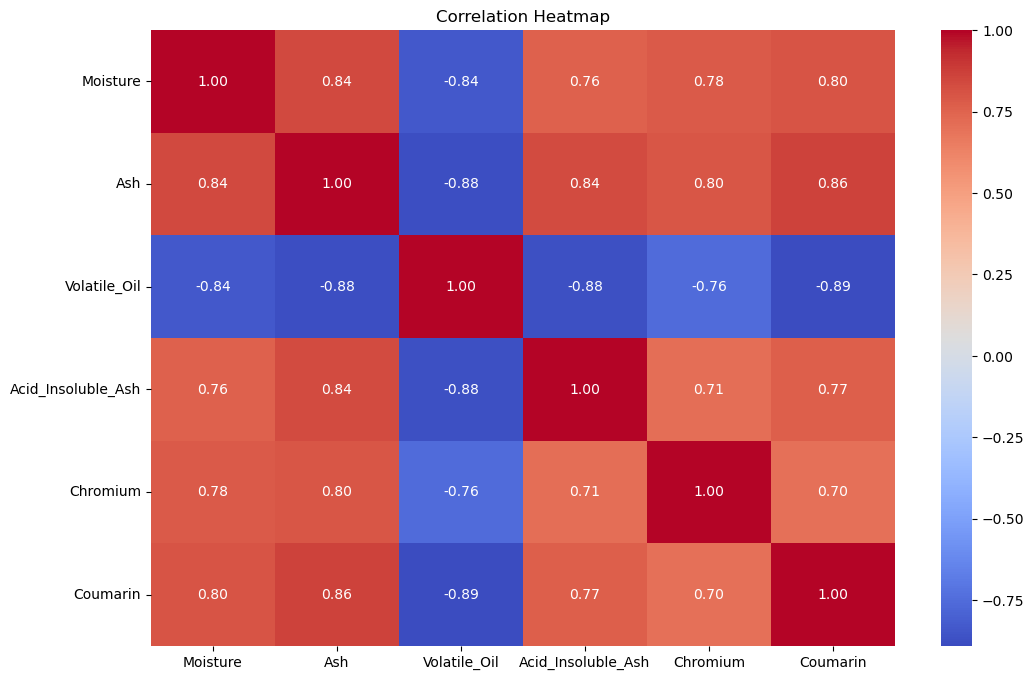

In [11]:
# 6. Correlation Matrix (Numerical Features Only)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

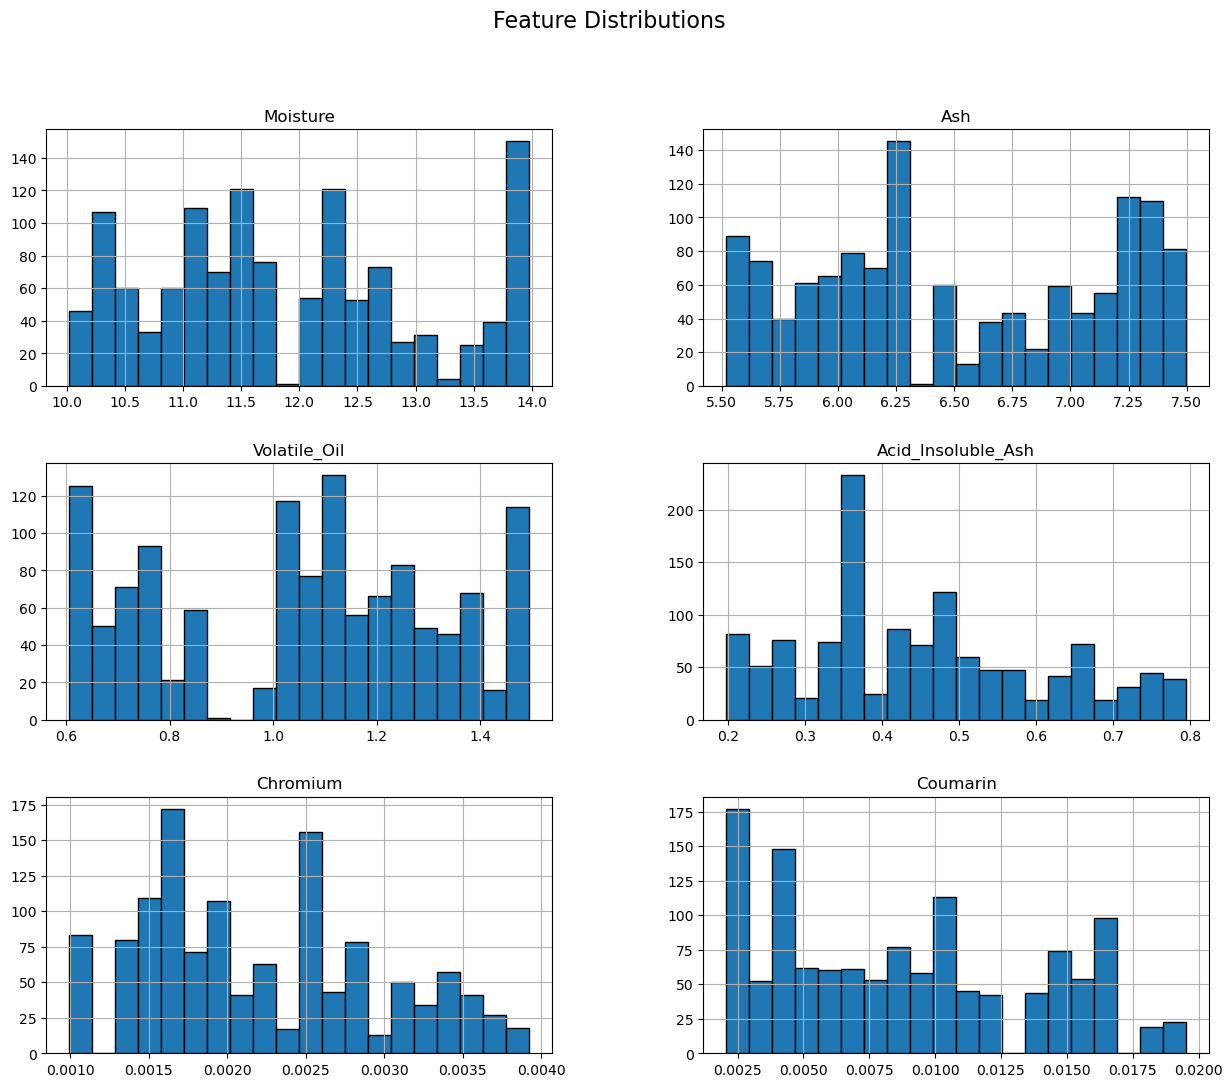

In [12]:
# 7. Distribution of each numerical feature
numeric_cols = numeric_df.columns
df[numeric_cols].hist(bins=20, figsize=(15, 12), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

In [13]:
df.to_csv('dataset/modified_cinnamon_quality_dataset.csv', index=False)